## Iris Classification

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# 1. Import the data
df = pd.read_csv("C:/Users/vishi/OneDrive/Desktop/Python/Datasets/churn.csv")

In [3]:
df.shape

(10001, 15)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10001 entries, 0 to 10000
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10001 non-null  int64  
 1   CustomerId       10001 non-null  int64  
 2   Surname          10001 non-null  object 
 3   CreditScore      9854 non-null   float64
 4   Geography        10001 non-null  object 
 5   Gender           9924 non-null   object 
 6   Age              10001 non-null  int64  
 7   Tenure           10001 non-null  int64  
 8   Balance          9997 non-null   float64
 9   NumOfProducts    9768 non-null   float64
 10  HasCrCard        10001 non-null  int64  
 11  IsActiveMember   10001 non-null  int64  
 12  EstimatedSalary  9946 non-null   float64
 13  Cr               10001 non-null  int64  
 14  Exited           10001 non-null  int64  
dtypes: float64(4), int64(8), object(3)
memory usage: 1.1+ MB


In [5]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Cr', 'Exited'],
      dtype='object')

In [6]:
# 2. Clean the data
df.isnull().sum()

RowNumber            0
CustomerId           0
Surname              0
CreditScore        147
Geography            0
Gender              77
Age                  0
Tenure               0
Balance              4
NumOfProducts      233
HasCrCard            0
IsActiveMember       0
EstimatedSalary     55
Cr                   0
Exited               0
dtype: int64

In [7]:
df.dropna(axis=0, how="any", subset=None, inplace =True)

In [8]:
df.shape

(9491, 15)

In [9]:
df.duplicated().sum()

1

In [10]:
df.drop_duplicates(keep = 'first', inplace=True)

In [11]:
df.shape

(9490, 15)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9490 entries, 0 to 10000
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        9490 non-null   int64  
 1   CustomerId       9490 non-null   int64  
 2   Surname          9490 non-null   object 
 3   CreditScore      9490 non-null   float64
 4   Geography        9490 non-null   object 
 5   Gender           9490 non-null   object 
 6   Age              9490 non-null   int64  
 7   Tenure           9490 non-null   int64  
 8   Balance          9490 non-null   float64
 9   NumOfProducts    9490 non-null   float64
 10  HasCrCard        9490 non-null   int64  
 11  IsActiveMember   9490 non-null   int64  
 12  EstimatedSalary  9490 non-null   float64
 13  Cr               9490 non-null   int64  
 14  Exited           9490 non-null   int64  
dtypes: float64(4), int64(8), object(3)
memory usage: 1.2+ MB


In [13]:
df['Geography'].value_counts()

Geography
France     4771
Germany    2368
Spain      2351
Name: count, dtype: int64

In [14]:
df['Gender'].value_counts()

Gender
Male      5188
Female    4302
Name: count, dtype: int64

In [15]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in ['Geography', 'Gender']:
    df[i] = le.fit_transform(df[i])


In [16]:
df['Geography'].value_counts()

Geography
0    4771
1    2368
2    2351
Name: count, dtype: int64

In [17]:
df['Gender'].value_counts()

Gender
1    5188
0    4302
Name: count, dtype: int64

In [18]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Cr,Exited
0,1,15634602,Hargrave,619.0,0,0,42,2,0.00,1.0,1,1,101348.88,1,1
1,2,15647311,Hill,608.0,2,0,41,1,83807.86,1.0,0,1,112542.58,3,0
2,3,15619304,Onio,502.0,0,0,42,8,159660.80,3.0,1,0,113931.57,3,1
3,4,15701354,Boni,699.0,0,0,39,1,0.00,2.0,0,0,93826.63,1,0
4,5,15737888,Mitchell,850.0,2,0,43,2,125510.82,1.0,1,1,79084.10,4,0


In [19]:
# 3. Split the data into train and test
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, test_size = 0.2, random_state = 1)
# train, test = train_test_split(iris, test_size = 0.2)

In [20]:
print(df.shape)
print(train.shape)
print(test.shape)

(9490, 15)
(7592, 15)
(1898, 15)


In [21]:
train.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Cr,Exited
7462,7462,15645571,Genovese,596.0,2,1,32,4,0.00,2.0,0,1,146504.35,3,0
6785,6785,15570912,Ogbonnaya,728.0,1,0,32,9,127772.10,2.0,1,1,152643.48,2,0
6100,6100,15743498,Winter,532.0,1,1,52,9,137755.76,1.0,1,0,163191.99,2,1
5153,5153,15799631,Chase,585.0,2,1,36,10,0.00,2.0,1,1,180318.60,4,0
7606,7606,15710138,Sun,718.0,2,1,39,6,0.00,2.0,0,1,63889.10,3,0


In [22]:
test.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Cr,Exited
4785,4785,15811588,Eluemuno,664.0,2,0,53,7,187602.18,1.0,1,0,186392.99,3,1
1378,1378,15808228,Tuan,768.0,2,0,44,6,60603.40,1.0,1,1,178045.97,5,0
4791,4791,15642022,Zito,621.0,2,1,34,8,0.00,1.0,0,0,47972.65,1,0
8622,8622,15673820,Woodward,568.0,0,1,33,7,0.00,2.0,1,0,143450.61,3,0
244,244,15596175,McIntosh,659.0,1,1,67,6,117411.60,1.0,1,1,45071.09,2,1


In [23]:
trainx = train.iloc[:, 3:14]
trainy = train.iloc[:, 14]
testx = test.iloc[:, 3:14]
testy = test.iloc[:, 14]

In [24]:
trainx.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Cr
7462,596.0,2,1,32,4,0.00,2.0,0,1,146504.35,3
6785,728.0,1,0,32,9,127772.10,2.0,1,1,152643.48,2
6100,532.0,1,1,52,9,137755.76,1.0,1,0,163191.99,2
5153,585.0,2,1,36,10,0.00,2.0,1,1,180318.60,4
7606,718.0,2,1,39,6,0.00,2.0,0,1,63889.10,3


In [25]:
trainy.head()

7462    0
6785    0
6100    1
5153    0
7606    0
Name: Exited, dtype: int64

In [26]:
testx.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Cr
4785,664.0,2,0,53,7,187602.18,1.0,1,0,186392.99,3
1378,768.0,2,0,44,6,60603.40,1.0,1,1,178045.97,5
4791,621.0,2,1,34,8,0.00,1.0,0,0,47972.65,1
8622,568.0,0,1,33,7,0.00,2.0,1,0,143450.61,3
244,659.0,1,1,67,6,117411.60,1.0,1,1,45071.09,2


In [27]:
testy.head()

4785    1
1378    0
4791    0
8622    0
244     1
Name: Exited, dtype: int64

In [28]:
# Supervised-Classification
from sklearn.tree import DecisionTreeClassifier as DT
model = DT(criterion = 'entropy', max_depth =3)
# learn a model
model.fit(trainx,trainy)
# Make predictions
predictions = model.predict(testx)

In [29]:
predictions[0:5]

array([1, 0, 0, 0, 0], dtype=int64)

In [30]:
testy.head()

4785    1
1378    0
4791    0
8622    0
244     1
Name: Exited, dtype: int64

In [31]:
accuracy = np.mean(predictions == testy)
accuracy

0.8303477344573235

In [32]:
def Predict_for_new_value(X_new):
    prediction = model.predict(X_new)
    if prediction == 0:
        return 'Leave'
    elif prediction == 1:
        return 'Stay'
    else:
        return 'Unknown status...'
    
X_new = np.array([[123, 1, 1, 54, 2, 4352, 2, 1, 1, 123321, 2]])
predicted_status = Predict_for_new_value(X_new)
print(predicted_status)

Leave


C:\Users\vishi\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


[Text(0.5, 0.875, 'Age <= 42.5\nentropy = 0.73\nsamples = 7592\nvalue = [6042, 1550]\nclass = 0'),
 Text(0.25, 0.625, 'NumOfProducts <= 2.5\nentropy = 0.52\nsamples = 5410\nvalue = [4778, 632]\nclass = 0'),
 Text(0.125, 0.375, 'NumOfProducts <= 1.5\nentropy = 0.477\nsamples = 5282\nvalue = [4741, 541]\nclass = 0'),
 Text(0.0625, 0.125, 'entropy = 0.647\nsamples = 2605\nvalue = [2174, 431]\nclass = 0'),
 Text(0.1875, 0.125, 'entropy = 0.247\nsamples = 2677\nvalue = [2567, 110]\nclass = 0'),
 Text(0.375, 0.375, 'Balance <= 61604.453\nentropy = 0.868\nsamples = 128\nvalue = [37, 91]\nclass = 1'),
 Text(0.3125, 0.125, 'entropy = 0.998\nsamples = 53\nvalue = [28, 25]\nclass = 0'),
 Text(0.4375, 0.125, 'entropy = 0.529\nsamples = 75\nvalue = [9, 66]\nclass = 1'),
 Text(0.75, 0.625, 'IsActiveMember <= 0.5\nentropy = 0.982\nsamples = 2182\nvalue = [1264, 918]\nclass = 0'),
 Text(0.625, 0.375, 'Age <= 50.5\nentropy = 0.972\nsamples = 992\nvalue = [398, 594]\nclass = 1'),
 Text(0.5625, 0.125, 'e

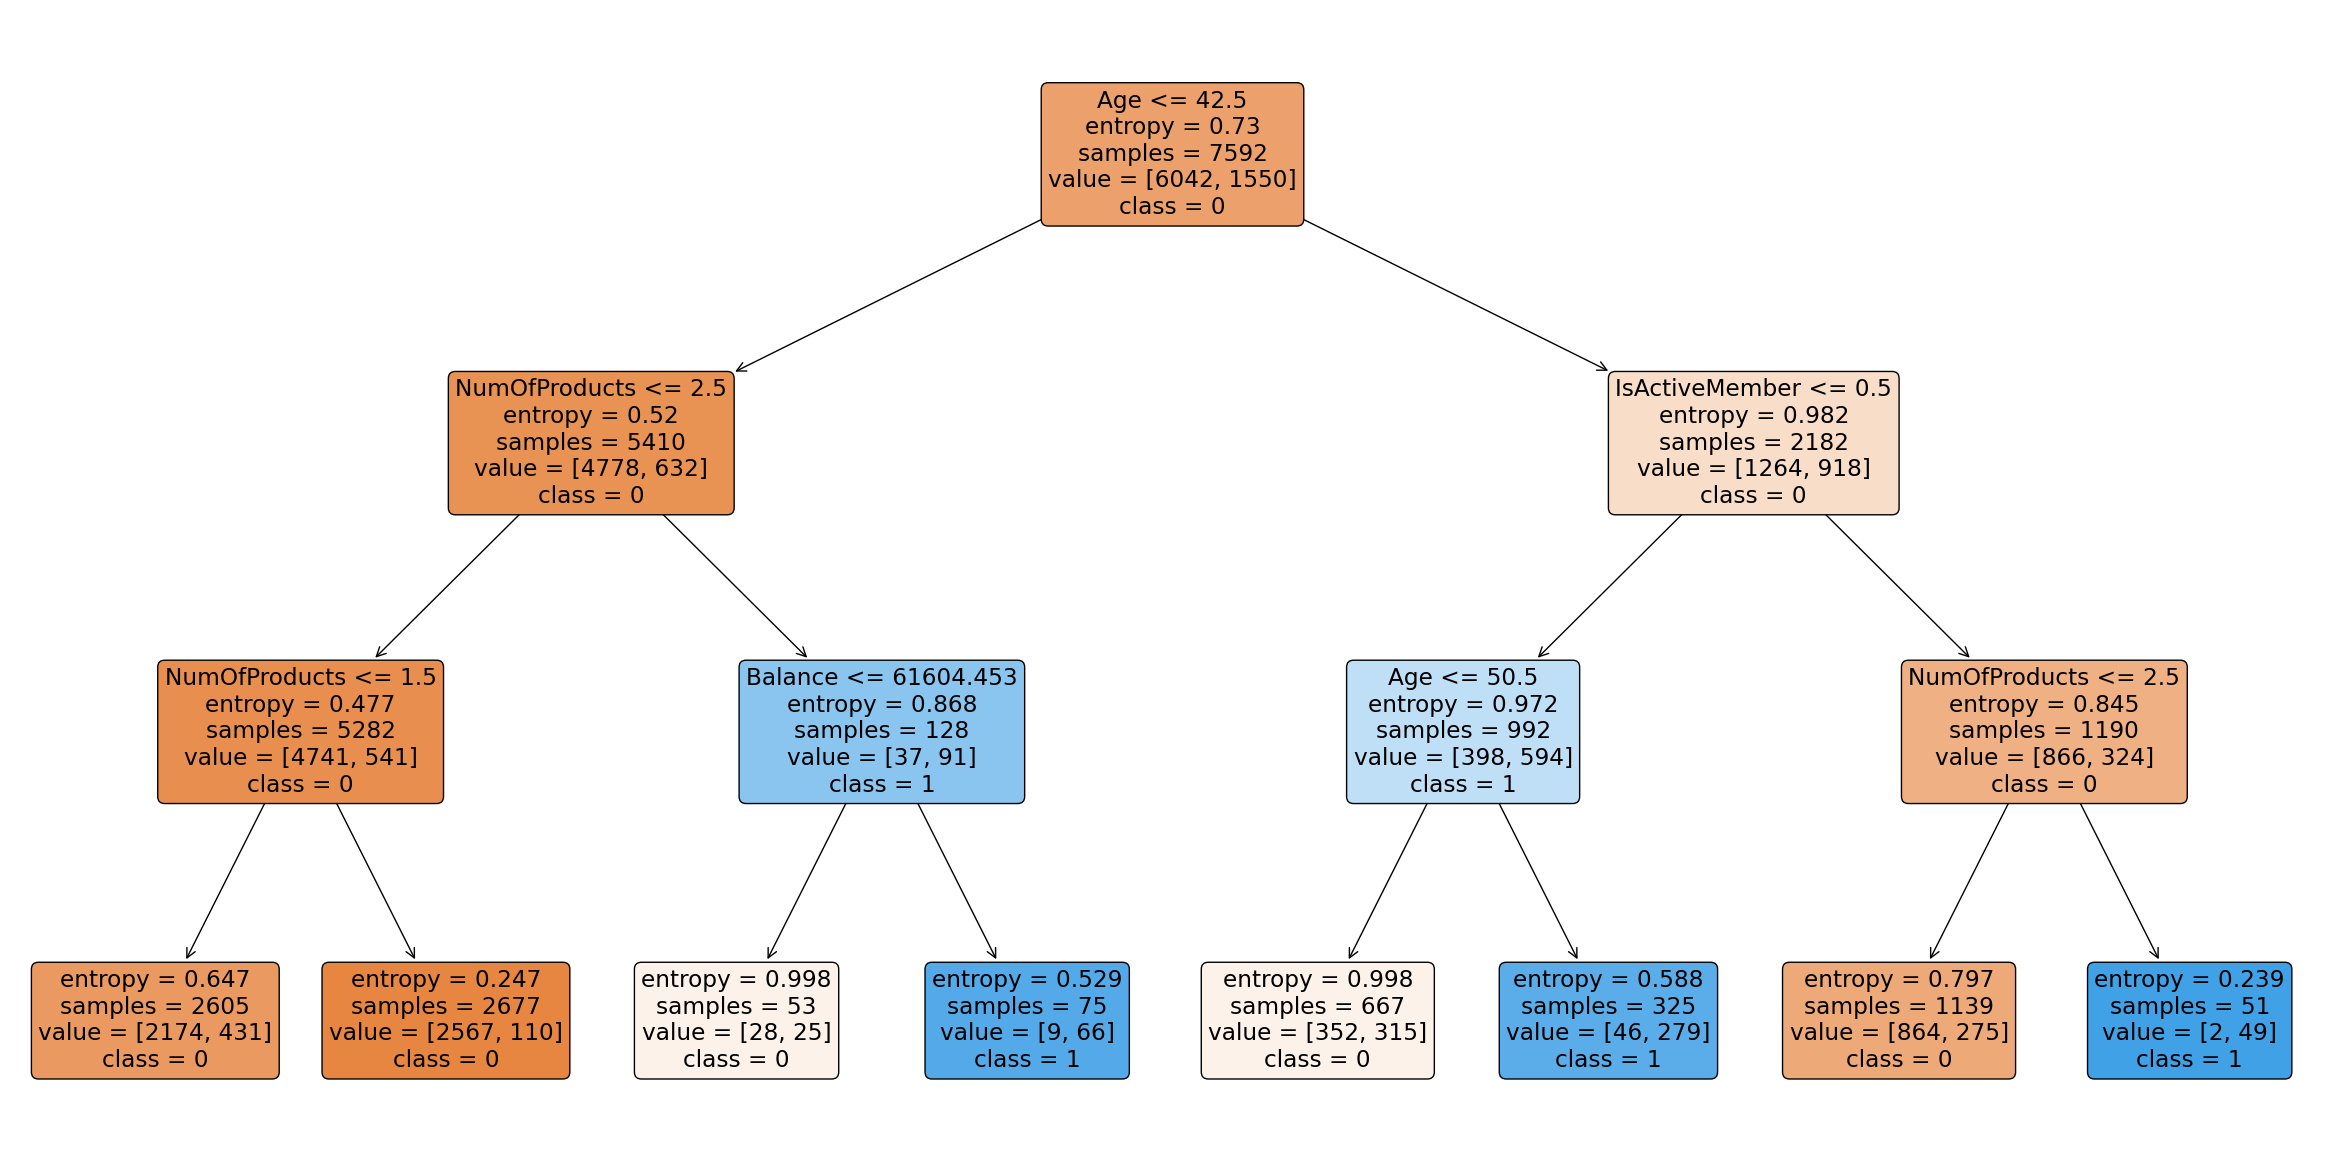

In [33]:
from sklearn import tree
plt.figure(figsize=(30,15))
tree.plot_tree(model,max_depth=None,feature_names=["CreditScore", "Geography", "Gender", "Age", "Tenure", "Balance", "NumOfProducts", "HasCrCard", "IsActiveMember", "EstimatedSalary", "Cr"],
               class_names=["0", "1"],label="all",rounded=True,filled=True)

In [39]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(testy, predictions)
cm

array([[1482,   17],
       [ 305,   94]], dtype=int64)